x_train shape: (60000, 28, 28) y_train shape: (60000,)


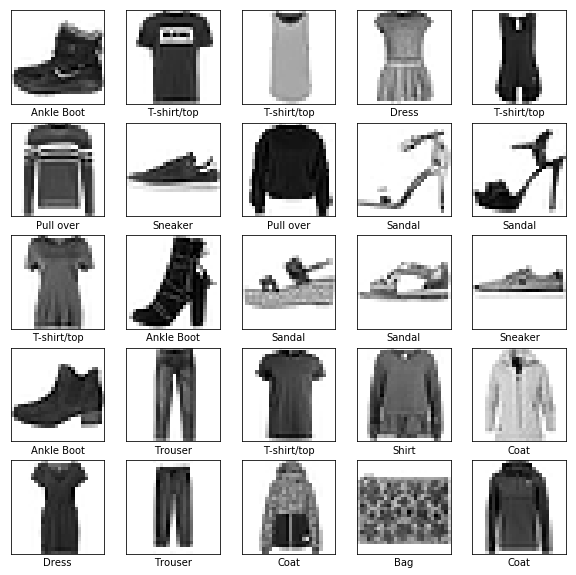

In [2]:
# import the proper libraries and load the data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline 

# load the fashion-mnist pre shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# create a dictionary for eacy type of the label
label = {0:"T-shirt/top", 1:"Trouser", 2:"Pull over", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}

print ("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# pinrt out the first 25 images to see if it matches the data label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(label[y_train[i]])
plt.show()

image #29605 is categorized as Ankle Boot


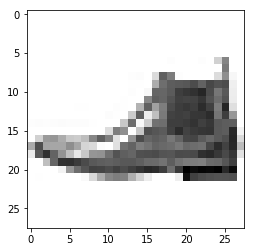

In [3]:
# test the data load with the random index
image_index = random.randint(1,60000)
plt.imshow(x_train[image_index],cmap='Greys')
print("image #%d is categorized as %s" %(image_index, label[y_train[image_index]]))



In [4]:
# reshaping the dataset to 4-dims so it works with Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Data normalization
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0



In [5]:
# import the keras function libraries for brevity
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# create the model, empty neural network
model = Sequential()

# define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3211520   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

Using TensorFlow backend.


In [6]:
# compile the model
# configure the learning process before training the model. here to define the type of loss function, optimizer and teh metrics evaluated by the model during training and testing
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

# Validation data set to be added!!




Epoch 1/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.4461 - acc: 0.8403
Epoch 2/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.3221 - acc: 0.8833
Epoch 3/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2875 - acc: 0.8936
Epoch 4/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.2640 - acc: 0.9045
Epoch 5/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2433 - acc: 0.9093
Epoch 6/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2330 - acc: 0.9136
Epoch 7/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2215 - acc: 0.9182
Epoch 8/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.2107 - acc: 0.9206
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1968 - acc: 0.9265
Epoch 10/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1894 - acc: 0

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 176us/step


[0.24511898490786552, 0.9175]

[[2.7609130e-05 7.5703426e-08 1.0032592e-02 2.0172666e-09 9.8701406e-01
  1.9641238e-09 2.9255261e-03 3.6941272e-10 8.1232443e-09 1.7642606e-08]]
Prediction for image number 10 is Coat


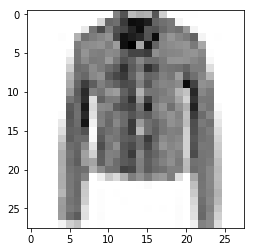

[[7.2839443e-04 3.9752132e-07 9.9823987e-01 1.7976345e-07 5.1505427e-05
  3.2067679e-10 9.7685482e-04 2.4553133e-09 2.6745047e-06 6.7335158e-08]]
Prediction for image number 20 is Pull over


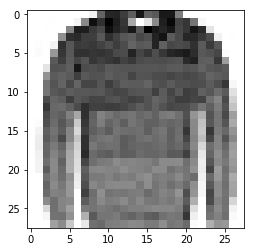

[[1.8056796e-18 8.3950381e-28 4.7701955e-19 1.2462754e-19 1.5033884e-17
  9.0764450e-19 6.4970223e-18 9.2243079e-18 1.0000000e+00 5.6292012e-20]]
Prediction for image number 30 is Bag


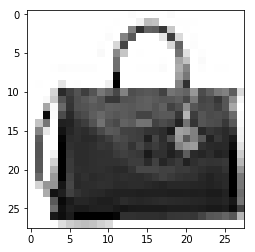

[[9.8814428e-01 1.9532571e-08 9.9036261e-06 1.0152096e-07 3.1698537e-06
  9.0443569e-11 1.1842102e-02 7.0532474e-10 3.8045809e-07 1.5960456e-08]]
Prediction for image number 40 is T-shirt/top


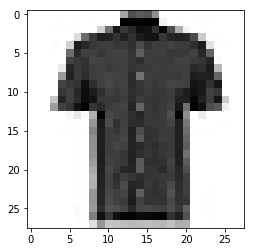

[[2.0935518e-05 2.0121911e-11 2.4172172e-03 3.0285486e-11 9.9507940e-01
  7.4469716e-13 2.4824443e-03 4.2699033e-15 5.0581899e-09 1.2500905e-09]]
Prediction for image number 50 is Coat


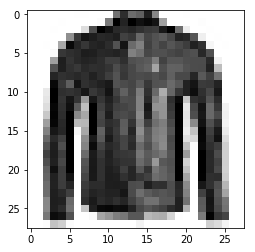

[[2.3893651e-07 6.4089758e-12 9.4101562e-09 7.5874827e-12 8.8529861e-12
  3.7856100e-07 7.7944588e-11 9.9999762e-01 6.9765186e-08 1.7077839e-06]]
Prediction for image number 60 is Sneaker


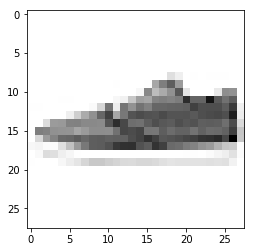

[[7.0174536e-07 1.1128670e-10 7.4955274e-08 1.1913365e-10 3.6522424e-11
  2.1237327e-04 1.7379175e-09 9.9978608e-01 3.4056136e-08 6.4813992e-07]]
Prediction for image number 70 is Sneaker


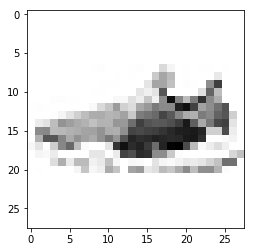

[[7.8411361e-08 9.9985945e-01 2.3972524e-08 1.8057830e-06 1.3848244e-04
  6.3502088e-09 1.8284119e-07 8.3231371e-13 9.3343311e-10 2.1103294e-11]]
Prediction for image number 80 is Trouser


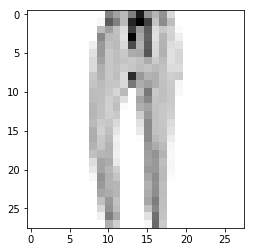

[[1.6986079e-13 1.7959600e-17 4.4735119e-13 4.8040706e-19 1.7951039e-17
  1.0000000e+00 2.4736163e-16 5.9009464e-10 1.4724044e-10 4.2300834e-13]]
Prediction for image number 90 is Sandal


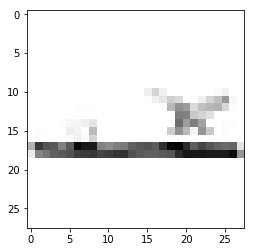

In [9]:
# evaluate ten images in the test set

plt.figure()
for i in range(1,10):
    image_index = 10*i
    plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
    pred = model.predict(x_test[image_index].reshape(1, 28,28,1))
    print(pred)
    print("Prediction for image number %d is" %image_index, label[pred.argmax()])
    plt.show() # lets image to show every loop iteration